Сегодня мы поговорим о морфологических анализаторах для русского языка и некоторых других языков.  

http://web-corpora.net/wsgi/mystemplus.wsgi/mystemplus/compare_table/ сравнение тэггеров.  

Не забудьте установить нужные библиотеки.

In [2]:
!pip install pymystem3

In [3]:
import re

In [4]:
text_rus = '''И пунша пламень голубой.
Люблю воинственную живость
Потешных Марсовых полей,
Пехотных ратей и коней
Однообразную красивость,
В их стройно зыблемом строю
Лоскутья сих знамён победных,
Сиянье шапок этих медных,
Насквозь простреленных в бою.'''

Токенизация через nltk:

In [5]:
from nltk.tokenize import word_tokenize

In [6]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [7]:
text_tokens_nltk = word_tokenize(text_rus)
print(text_tokens_nltk)

['И', 'пунша', 'пламень', 'голубой', '.', 'Люблю', 'воинственную', 'живость', 'Потешных', 'Марсовых', 'полей', ',', 'Пехотных', 'ратей', 'и', 'коней', 'Однообразную', 'красивость', ',', 'В', 'их', 'стройно', 'зыблемом', 'строю', 'Лоскутья', 'сих', 'знамён', 'победных', ',', 'Сиянье', 'шапок', 'этих', 'медных', ',', 'Насквозь', 'простреленных', 'в', 'бою', '.']


Mystem -- свободно распространяемая библиотека с закрытым кодом. Майстем сам умеет токенизировать. Он устанавливает словарную форму (лемму), определяет часть речи и даёт разную морфологическую информацию, при этом выбирая один из наиболее вероятных разборов.

In [8]:
from pymystem3 import Mystem

# сохраняем класс в переменную
mystem = Mystem()

Installing mystem to /root/.local/bin/mystem from http://download.cdn.yandex.net/mystem/mystem-3.1-linux-64bit.tar.gz


In [9]:
text_analyzed = mystem.analyze(text_rus)
text_analyzed

[{'analysis': [{'lex': 'и', 'wt': 0.9999770357, 'gr': 'CONJ='}], 'text': 'И'},
 {'text': ' '},
 {'analysis': [{'lex': 'пунш', 'wt': 1, 'gr': 'S,муж,неод=род,ед'}],
  'text': 'пунша'},
 {'text': ' '},
 {'analysis': [{'lex': 'пламень',
    'wt': 1,
    'gr': 'S,неод=(им,ед,муж|вин,ед,муж)'}],
  'text': 'пламень'},
 {'text': ' '},
 {'analysis': [{'lex': 'голубой',
    'wt': 0.9983341496,
    'gr': 'A=(вин,ед,полн,муж,неод|им,ед,полн,муж|пр,ед,полн,жен|дат,ед,полн,жен|род,ед,полн,жен|твор,ед,полн,жен)'}],
  'text': 'голубой'},
 {'text': '.'},
 {'text': '\n'},
 {'analysis': [{'lex': 'любить',
    'wt': 1,
    'gr': 'V,несов,пе=непрош,ед,изъяв,1-л'}],
  'text': 'Люблю'},
 {'text': ' '},
 {'analysis': [{'lex': 'воинственный', 'wt': 1, 'gr': 'A=вин,ед,полн,жен'}],
  'text': 'воинственную'},
 {'text': ' '},
 {'analysis': [{'lex': 'живость', 'wt': 1, 'gr': 'S,жен,неод=(вин,ед|им,ед)'}],
  'text': 'живость'},
 {'text': '\n'},
 {'analysis': [{'lex': 'потешный',
    'wt': 1,
    'gr': 'A=(пр,мн,пол

In [10]:
print(text_analyzed[4])

{'analysis': [{'lex': 'пламень', 'wt': 1, 'gr': 'S,неод=(им,ед,муж|вин,ед,муж)'}], 'text': 'пламень'}


In [11]:
print(type(text_analyzed))

<class 'list'>


Можно делать отдельные вещи:

In [12]:
text_lemmatized = mystem.lemmatize(text_rus)
print(text_lemmatized)

['и', ' ', 'пунш', ' ', 'пламень', ' ', 'голубой', '.', '\n', 'любить', ' ', 'воинственный', ' ', 'живость', '\n', 'потешный', ' ', 'марсовой', ' ', 'поле', ',\n', 'пехотный', ' ', 'рать', ' ', 'и', ' ', 'конь', '\n', 'однообразный', ' ', 'красивость', ',\n', 'в', ' ', 'их', ' ', 'стройно', ' ', 'зыбить', ' ', 'строй', '\n', 'лоскут', ' ', 'сей', ' ', 'знамя', ' ', 'победный', ',\n', 'сияние', ' ', 'шапка', ' ', 'этот', ' ', 'медный', ',\n', 'насквозь', ' ', 'прострелить', ' ', 'в', ' ', 'бой', '.', '\n']


Можно склеить всё в один лемматизированный текст:

In [13]:
new_text_lemmatized = ''.join(text_lemmatized)
print(new_text_lemmatized)

и пунш пламень голубой.
любить воинственный живость
потешный марсовой поле,
пехотный рать и конь
однообразный красивость,
в их стройно зыбить строй
лоскут сей знамя победный,
сияние шапка этот медный,
насквозь прострелить в бой.



In [14]:
# сделаем все красиво с индексами и доступом по ключам

print('Слово - ', text_analyzed[0]['text'])
print('Разбор слова - ', text_analyzed[0]['analysis'][0])
print('Лемма слова - ', text_analyzed[0]['analysis'][0]['lex'])
print('Грамматическая информация слова2 - ', text_analyzed[0]['analysis'][0]['gr'])

Слово -  И
Разбор слова -  {'lex': 'и', 'wt': 0.9999770357, 'gr': 'CONJ='}
Лемма слова -  и
Грамматическая информация слова2 -  CONJ=


In [15]:
text_analyzed[0] #чтобы понять, что происходит наверху

{'analysis': [{'lex': 'и', 'wt': 0.9999770357, 'gr': 'CONJ='}], 'text': 'И'}

Функция, чтобы прикрепить частеречные теги к словам

In [16]:
def process_mystem_analysis(analysis_results):
    """
    Преобразует результаты анализа mystem в список токенов формата "слово_ЧастьРечи"

    Параметры:
    analysis_results (list): Результат работы метода mystem.analyze()

    Возвращает:
    list: Список строк в формате "слово_ЧастьРечи"
    """
    result_tokens = []

    for item in analysis_results:
        # Пропускаем пробелы и знаки препинания
        if item.get('text', '').strip() == '' or 'analysis' not in item:
            continue

        # Получаем текст токена
        token_text = item['text'].lower()

        # Если есть анализ и он не пустой
        if 'analysis' in item and item['analysis']:
            # Берем первый (наиболее вероятный) вариант анализа
            first_analysis = item['analysis'][0]

            # Извлекаем часть речи из поля 'gr'
            if 'gr' in first_analysis:
                # Извлекаем первую часть до запятой или знака равенства
                pos_tag = first_analysis['gr'].split(',')[0].split('=')[0]

                # Формируем токен в формате "слово_ЧастьРечи"
                formatted_token = f"{token_text}_{pos_tag}"
                result_tokens.append(formatted_token)
            else:
                # Если нет информации о части речи, добавляем просто слово
                result_tokens.append(token_text)
        else:
            # Если нет анализа, добавляем просто слово
            result_tokens.append(token_text)

    return result_tokens

In [17]:
# Преобразование в список токенов
tagged_tokens = process_mystem_analysis(text_analyzed)

# Вывод результата
print(" ".join(tagged_tokens))

и_CONJ пунша_S пламень_S голубой_A люблю_V воинственную_A живость_S потешных_A марсовых_S полей_S пехотных_A ратей_S и_CONJ коней_S однообразную_A красивость_S в_PR их_APRO стройно_ADV зыблемом_V строю_S лоскутья_S сих_APRO знамён_S победных_A сиянье_S шапок_S этих_APRO медных_A насквозь_ADV простреленных_V в_PR бою_S


Можно посмотреть предсказания для отдельных слов:

In [18]:
mystem.analyze('стекла')

[{'analysis': [{'lex': 'стекло',
    'wt': 0.9946103594,
    'gr': 'S,сред,неод=(вин,мн|род,ед|им,мн)'}],
  'text': 'стекла'},
 {'text': '\n'}]

In [19]:
mystem.analyze('стали')

[{'analysis': [{'lex': 'становиться',
    'wt': 0.9821285244,
    'gr': 'V,нп=прош,мн,изъяв,сов'}],
  'text': 'стали'},
 {'text': '\n'}]

In [20]:
mystem.analyze('стекла и стали нам не хватает')

[{'analysis': [{'lex': 'стекло',
    'wt': 0.9946103594,
    'gr': 'S,сред,неод=(вин,мн|род,ед|им,мн)'}],
  'text': 'стекла'},
 {'text': ' '},
 {'analysis': [{'lex': 'и', 'wt': 0.9999770357, 'gr': 'CONJ='}], 'text': 'и'},
 {'text': ' '},
 {'analysis': [{'lex': 'становиться',
    'wt': 0.9821285244,
    'gr': 'V,нп=прош,мн,изъяв,сов'}],
  'text': 'стали'},
 {'text': ' '},
 {'analysis': [{'lex': 'мы', 'wt': 1, 'gr': 'SPRO,мн,1-л=дат'}],
  'text': 'нам'},
 {'text': ' '},
 {'analysis': [{'lex': 'не', 'wt': 1, 'gr': 'PART='}], 'text': 'не'},
 {'text': ' '},
 {'analysis': [{'lex': 'хватать',
    'wt': 1,
    'gr': 'V,несов=(непрош,ед,изъяв,3-л|непрош,изъяв)'}],
  'text': 'хватает'},
 {'text': '\n'}]

In [21]:
mystem.analyze('кринжевать')

[{'analysis': [{'lex': 'кринжевать',
    'wt': 0.1624500426,
    'qual': 'bastard',
    'gr': 'V,несов,пе=инф'},
   {'lex': 'кринжевать',
    'wt': 0.1612166906,
    'qual': 'bastard',
    'gr': 'V,несов,нп=инф'}],
  'text': 'кринжевать'},
 {'text': '\n'}]

In [22]:
mystem.analyze('Глокая куздра штеко будланула бокра и курдячит бокрёнка')

[{'analysis': [{'lex': 'глокай',
    'wt': 0.09304979929,
    'qual': 'bastard',
    'gr': 'S,муж,неод=род,ед'}],
  'text': 'Глокая'},
 {'text': ' '},
 {'analysis': [{'lex': 'куздра',
    'wt': 0.6292693823,
    'qual': 'bastard',
    'gr': 'S,ед,жен,неод=им'}],
  'text': 'куздра'},
 {'text': ' '},
 {'analysis': [{'lex': 'штеко',
    'wt': 0.2574119755,
    'qual': 'bastard',
    'gr': 'ADV='}],
  'text': 'штеко'},
 {'text': ' '},
 {'analysis': [{'lex': 'будланул',
    'wt': 0.03753661836,
    'qual': 'bastard',
    'gr': 'S,муж,од=(вин,ед|род,ед)'}],
  'text': 'будланула'},
 {'text': ' '},
 {'analysis': [{'lex': 'бокра',
    'wt': 0.8898982327,
    'qual': 'bastard',
    'gr': 'S,ед,жен,неод=им'}],
  'text': 'бокра'},
 {'text': ' '},
 {'analysis': [{'lex': 'и', 'wt': 0.9999770357, 'gr': 'CONJ='}], 'text': 'и'},
 {'text': ' '},
 {'analysis': [{'lex': 'курдячить',
    'wt': 0.5,
    'qual': 'bastard',
    'gr': 'V,обсц,сов,пе=непрош,ед,изъяв,3-л'}],
  'text': 'курдячит'},
 {'text': ' '}

Некоторые вещи, которые могут встретиться в нотации:  

const (  
	Dictionary  = 0        // слово из словаря  
	Bastard     = 1        // не словарное  
	Sob         = 2        // из "быстрого словаря"  
	Prefixoid   = 4        // словарное + стандартный префикс (авто- мото- кино- фото-) всегда в компании с Bastard или Sob  
	Foundling   = 8        // непонятный набор букв, но проходящий в алфавит  
	BadRequest  = 16       // доп. флаг.: "плохая лемма" при наличии "хорошей" альтернативы ("махать" по форме "маша")  
	FromEnglish = 65536    // переведено с английского  
	ToEnglish   = 131072   // переведено на английский  
	Untranslit  = 262144   // "переведено" с транслита  
	Overrode    = 1048576  // текст леммы был перезаписан  
	Fix         = 16777216 // слово из фикс-листа  
    
https://pkg.go.dev/github.com/dveselov/mystem#section-readme

In [23]:
mystem.analyze('мы стали более лучше одеваться')

[{'analysis': [{'lex': 'мы', 'wt': 1, 'gr': 'SPRO,мн,1-л=им'}], 'text': 'мы'},
 {'text': ' '},
 {'analysis': [{'lex': 'становиться',
    'wt': 0.9821285244,
    'gr': 'V,нп=прош,мн,изъяв,сов'}],
  'text': 'стали'},
 {'text': ' '},
 {'analysis': [{'lex': 'более', 'wt': 0.9999468251, 'gr': 'ADV='}],
  'text': 'более'},
 {'text': ' '},
 {'analysis': [{'lex': 'хорошо', 'wt': 0.5632475519, 'gr': 'ADV=срав,вводн'}],
  'text': 'лучше'},
 {'text': ' '},
 {'analysis': [{'lex': 'одеваться', 'wt': 1, 'gr': 'V,нп=инф,несов'}],
  'text': 'одеваться'},
 {'text': '\n'}]

In [24]:
mystem.analyze('сплав стали')

[{'analysis': [{'lex': 'сплав', 'wt': 1, 'gr': 'S,муж,неод=(вин,ед|им,ед)'}],
  'text': 'сплав'},
 {'text': ' '},
 {'analysis': [{'lex': 'становиться',
    'wt': 0.9821285244,
    'gr': 'V,нп=прош,мн,изъяв,сов'}],
  'text': 'стали'},
 {'text': '\n'}]

Плюсы Mystem:
- В целом высокое качество;
- Разрешается омонимия;
- Учитывается контекст при разборе;
- Основан на разметке НКРЯ.

Минусы Mystem:
- Медленный;  
- Требует некоторой работы для вывода на экран в удобочитаемом виде.

NLTK для английского языка

In [30]:
from nltk.tokenize import word_tokenize
import nltk

Список тэгов (Universal dependencies): https://universaldependencies.org/u/pos/
Список частеречных тэгов (Penn): https://cs.nyu.edu/~grishman/jet/guide/PennPOS.html   

In [26]:
nltk.download('universal_tagset')

[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.


True

In [27]:
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [28]:
text_2 = 'I love cats.'
text_tok = word_tokenize(text_2) #мы импортировали уже знакомый вам токенизатор из NLTK. Токенизация нужна для разметки в этой библиотеке
tagged = nltk.pos_tag(text_tok)
tagged

[('I', 'PRP'), ('love', 'VBP'), ('cats', 'NNS'), ('.', '.')]

In [41]:
text_tok = word_tokenize(text_rus)
tagged = nltk.pos_tag(text_tok, lang='rus') #тэгсет похож на НКРЯ
tagged

LookupError: 
**********************************************************************
  Resource [93maveraged_perceptron_tagger_rus[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('averaged_perceptron_tagger_rus')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtaggers/averaged_perceptron_tagger_rus/[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


Можно "подклеить" для удобства тэги к слову.

In [31]:
list_of_tagged = []
for elem in tagged:
    tag_tog = '_'.join(elem)
    list_of_tagged.append(tag_tog)
print(list_of_tagged)

['I_PRP', 'love_VBP', 'cats_NNS', '._.']


In [42]:
# Имя файла
text = "text_morph.txt"

# Чтение файла
with open(text, 'r', encoding='utf-8') as file:
    txt = file.read()

print(f"Файл успешно прочитан. Длина текста: {len(txt)} символов")
print(f"Тип переменной text_string: {type(txt)}")
txt[0:50]

Файл успешно прочитан. Длина текста: 3571 символов
Тип переменной text_string: <class 'str'>


'A Day in the Life of a University Student\nThe shri'

In [43]:
tagged_list = []
tokenized_txt = word_tokenize(txt)
for tagged_w in nltk.pos_tag(tokenized_txt, tagset='universal'):
  tagged_list.append('_'.join(tagged_w))
print(' '.join(tagged_list))
resulting_text = ' '.join(tagged_list)

A_DET Day_NOUN in_ADP the_DET Life_NOUN of_ADP a_DET University_NOUN Student_NOUN The_DET shrill_NOUN sound_NOUN of_ADP my_PRON alarm_NOUN pierces_NOUN through_ADP the_DET darkness_NOUN at_ADP 6:30_NUM AM_NOUN ._. I_PRON groan_VERB and_CONJ reach_VERB for_ADP my_PRON phone_NOUN ,_. hitting_VERB snooze_ADJ one_NUM more_ADJ time—a_ADJ daily_ADJ ritual_NOUN that_DET buys_VERB me_PRON those_DET precious_ADJ ten_ADJ minutes_NOUN of_ADP extra_ADJ sleep_NOUN ._. When_ADV I_PRON finally_ADV drag_VERB myself_PRON out_ADP of_ADP bed_NOUN ,_. the_DET small_ADJ dorm_NOUN room_NOUN is_VERB still_ADV dark_ADJ ,_. my_PRON roommate_NOUN 's_PRT gentle_ADJ snoring_VERB a_DET reminder_NOUN that_ADP not_ADV everyone_NOUN has_VERB early_ADJ morning_NOUN lectures_NOUN ._. Morning_NOUN classes_NOUN are_VERB always_ADV a_DET challenge_NOUN ._. I_PRON quickly_ADV shower_VERB ,_. grab_VERB a_DET granola_NOUN bar_NOUN ,_. and_CONJ fill_VERB my_PRON travel_NOUN mug_NOUN with_ADP coffee—the_ADJ lifeblood_NOUN of_A

Сколько у нас частей речи определенного вида?

In [44]:
#для этого нам понадобятся регулярные выражения
number_of_pos = re.findall('[a-zA-Z]+_ADJ', resulting_text)
print(f'Your text has {len(number_of_pos)} adjectives.')

Your text has 51 adjectives.


In [35]:
from nltk import FreqDist

In [36]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [37]:
from nltk.corpus import stopwords

Посмотрим на распределение без учёта частей речи:

In [39]:
stop_words = set(stopwords.words("english"))

In [45]:
filtered_list = []
for word in tokenized_txt:
  if word.casefold() not in stop_words:
    filtered_list.append(word)
    new_text = ' '.join(filtered_list) #второй этап - убрали стоп-слова

    tokenized_txt = word_tokenize(new_text.lower())
    frequency_distribution_1 = FreqDist(tokenized_txt)

<Axes: xlabel='Samples', ylabel='Counts'>

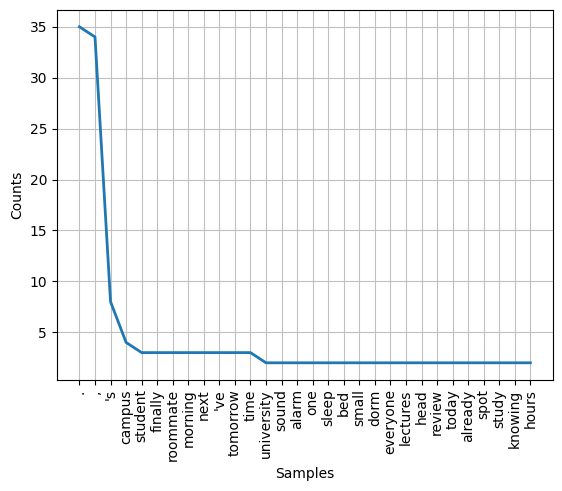

In [46]:
frequency_distribution_1.plot(30, cumulative=False)

Повторим то же самое, только с учётом частеречных тэгов:

In [47]:
tagged_words = nltk.pos_tag(tokenized_txt, tagset='universal')

tagged_list = ['_'.join(tagged_w) for tagged_w in tagged_words]

resulting_text = ' '.join(tagged_list)

processed_tokens = word_tokenize(resulting_text.lower())

frequency_distribution_2 = FreqDist(processed_tokens)


<Axes: xlabel='Samples', ylabel='Counts'>

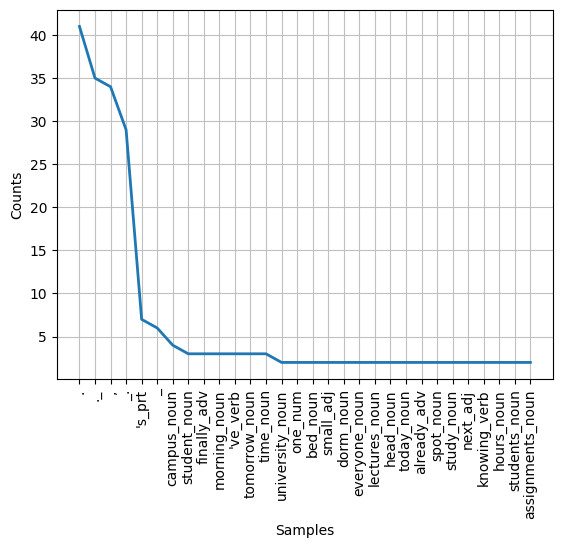

In [48]:
frequency_distribution_2.plot(30, cumulative=False)

**Задание 1.** Извлеките ключевые слова из любых 2х текстов на английском и русском языке (не менее 4000 символов) тремя способами:  
    1) Используя просто токены;  
    2) Разметив на части речи;  
    3) Оставив только леммы или стеммы. Отличаются ли результат в топ-30?   
Визуализируйте с помощью frequency_distribution.plot. и библиотеки matplotlib

In [49]:
text_en = "text_en.txt"
text_ru = "text_ru.txt"

# Чтение файла
with open(text_en, 'r', encoding='utf-8') as file:
    text_en = file.read()

print(f"Файл успешно прочитан. Длина текста: {len(text_en)} символов")

# Чтение файла
with open(text_ru, 'r', encoding='utf-8') as file:
    text_ru = file.read()

print(f"Файл успешно прочитан. Длина текста: {len(text_ru)} символов")

Файл успешно прочитан. Длина текста: 14612 символов
Файл успешно прочитан. Длина текста: 7329 символов


In [50]:
ru_stopwords = set(stopwords.words("russian"))
en_stopwords = set(stopwords.words("english"))

In [51]:
def clean_text(text):
  text = re.sub(r'[^\w\s]', ' ', text)
  text = re.sub(r'\d+', '', text)
  text = re.sub(r'\s+', ' ', text)
  text = re.sub(r'\n', ' ', text)

  text = ' '.join(text.lower().split())

  return text

In [52]:
# Способ 1
text_ru = clean_text(text_ru)
text_tokens_nltk_ru = word_tokenize(text_ru)
ru_filtered_tokens = [token for token in text_tokens_nltk_ru if token not in ru_stopwords]
print(ru_filtered_tokens)

text_en = clean_text(text_en)
text_tokens_nltk_en = word_tokenize(text_en)
en_filtered_tokens = [token for token in text_tokens_nltk_en if token not in en_stopwords]
print(en_filtered_tokens)

['ирбис', 'повелитель', 'горных', 'заснеженных', 'вершин', 'сегодня', 'международный', 'день', 'снежного', 'барса', 'самое', 'время', 'поговорить', 'одной', 'самых', 'скрытных', 'малоизученных', 'кошек', 'нашей', 'планете', 'ирбис', 'единственный', 'представитель', 'семейства', 'кошачьих', 'обитающий', 'суровых', 'условиях', 'высокогорий', 'круглый', 'год', 'лежит', 'снег', 'само', 'название', 'ирбис', 'появилось', 'нашем', 'языке', 'ещё', 'xvii', 'веке', 'благодаря', 'тюркским', 'охотникам', 'которые', 'продавали', 'шкуры', 'диких', 'кошек', 'русским', 'купцам', 'меховщикам', 'называли', 'снежного', 'барса', 'ильберс', 'ирбиш', 'ирвиз', 'переводе', 'тюркского', 'дословно', 'означает', 'снежная', 'кошка', 'впоследствии', 'названия', 'слились', 'воедино', 'образовали', 'одно', 'ирбиз', 'течением', 'времени', 'буква', 'з', 'нем', 'сменилась', 'впервые', 'диковинном', 'звере', 'европейские', 'зоологи', 'узнали', 'году', 'привезенных', 'исследователем', 'жоржем', 'бюффоном', 'картинок', 'к

<Axes: xlabel='Samples', ylabel='Counts'>

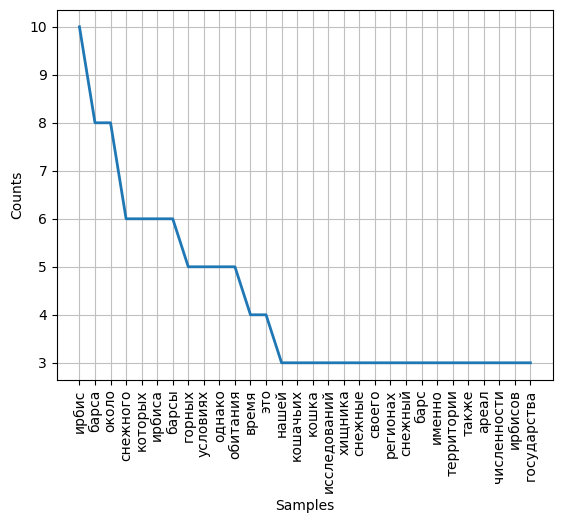

In [57]:
frequency_distribution_1 = FreqDist(ru_filtered_tokens)
frequency_distribution_1.plot(30, cumulative=False)

<Axes: xlabel='Samples', ylabel='Counts'>

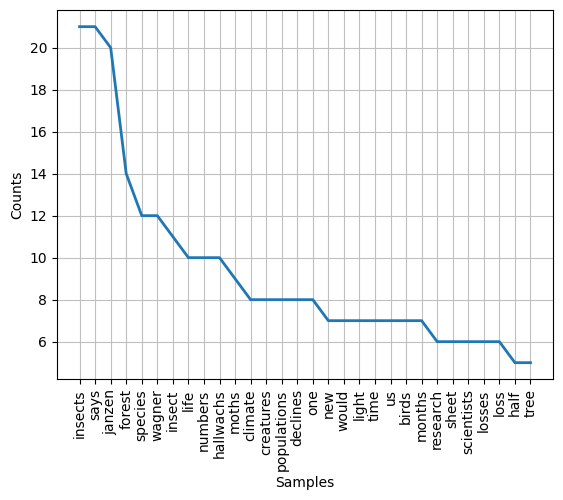

In [58]:
frequency_distribution_2 = FreqDist(en_filtered_tokens)
frequency_distribution_2.plot(30, cumulative=False)

In [56]:
# Способ 2
tagged_en = nltk.pos_tag(en_filtered_tokens, tagset = 'universal')

filtered_tagged_en = [
    (word, tag) for word, tag in tagged_en
    if tag in {'NOUN', 'VERB', 'ADJ', 'ADV'}
]
list_of_tagged_EN = ['_'.join(elem) for elem in filtered_tagged_en]
print(list_of_tagged_EN)

['half_NOUN', 'tree_ADJ', 'life_NOUN', 'ecologists_NOUN', 'horror_VERB', 'nature_ADJ', 'reserves_NOUN', 'emptied_VERB', 'insects_NOUN', 'new_ADJ', 'point_NOUN', 'history_NOUN', 'reached_VERB', 'entomologists_NOUN', 'say_VERB', 'climate_NOUN', 'led_VERB', 'species_NOUN', 'collapse_NOUN', 'moves_NOUN', 'food_NOUN', 'chain_NOUN', 'even_ADV', 'supposedly_ADV', 'protected_VERB', 'regions_NOUN', 'free_ADJ', 'pesticides_NOUN', 'daniel_VERB', 'janzen_ADJ', 'began_VERB', 'watching_VERB', 'insects_NOUN', 'truly_ADV', 'watching_VERB', 'ribcage_NOUN', 'shattered_VERB', 'nearly_ADV', 'half_ADJ', 'century_NOUN', 'young_ADJ', 'ecologist_NOUN', 'documenting_VERB', 'fruit_NOUN', 'crops_NOUN', 'dense_VERB', 'stretch_NOUN', 'costa_NOUN', 'rican_ADJ', 'forest_NOUN', 'fell_VERB', 'ravine_NOUN', 'landing_VERB', 'back_ADV', 'long_ADV', 'lens_VERB', 'camera_NOUN', 'punched_VERB', 'ribs_NOUN', 'snapping_VERB', 'bones_NOUN', 'thorax_ADV', 'slowly_ADV', 'dragged_VERB', 'crawling_VERB', 'nearly_ADV', 'miles_NOUN'

<Axes: xlabel='Samples', ylabel='Counts'>

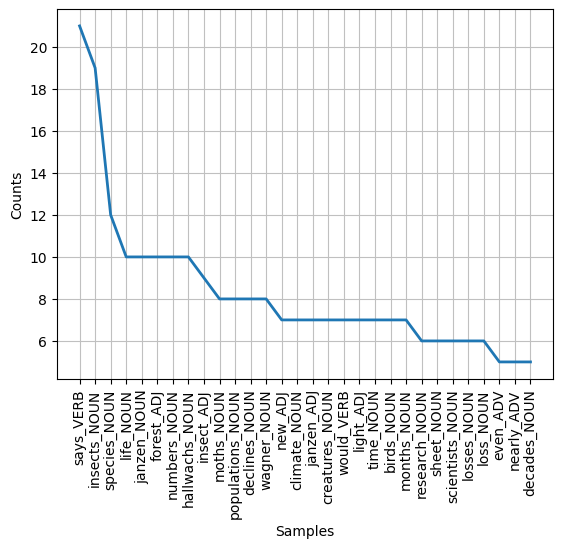

In [59]:
frequency_distribution_4 = FreqDist(list_of_tagged_EN)
frequency_distribution_4.plot(30, cumulative=False)

In [54]:
!pip install pymystem3
from pymystem3 import Mystem
mystem = Mystem()
def extract_pos_from_mystem(text):
  pos_map = {
          'S': 'NOUN',
          'A': 'ADJ',
          'V': 'VERB',
          'ADV': 'ADV',
          'PR': 'PRON',
          'CONJ': 'CONJ',
          'PREP': 'ADP',
          'NUM': 'NUM',
          'INTJ': 'INTJ',
      }

  tokens_with_pos = []
  for item in text:
          if 'analysis' not in item:
              continue

          text = item['text'].strip()
          analysis = item['analysis']

          if analysis:
              first_analysis = analysis[0]
              gr = first_analysis['gr']

              pos_tag = re.split(r'[|,|]', gr)[0]
              universal_tag = pos_map.get(pos_tag, 'X')
              tokens_with_pos.append((text, universal_tag))
          else:
              tokens_with_pos.append((text, 'X'))
  return tokens_with_pos

def filter_text_pos(tokens_with_pos, allowed_pos={'NOUN', 'ADJ', 'VERB', 'ADV'}):
  filtered = [
          f"{word}_{tag}"
          for word, tag in tokens_with_pos
          if tag in allowed_pos
      ]
  return filtered
text_analyzed_ru = mystem.analyze(text_ru)
tokens_with_pos = extract_pos_from_mystem(text_analyzed_ru)
list_of_tagged_RU = filter_text_pos(tokens_with_pos)
print(list_of_tagged_RU)

['ирбис_NOUN', 'повелитель_NOUN', 'вершин_NOUN', 'день_NOUN', 'барса_NOUN', 'время_NOUN', 'поговорить_VERB', 'кошек_NOUN', 'планете_NOUN', 'ирбис_NOUN', 'представитель_NOUN', 'семейства_NOUN', 'кошачьих_ADJ', 'обитающий_VERB', 'условиях_NOUN', 'высокогорий_NOUN', 'год_NOUN', 'лежит_VERB', 'снег_NOUN', 'название_NOUN', 'ирбис_NOUN', 'появилось_VERB', 'языке_NOUN', 'веке_NOUN', 'охотникам_NOUN', 'продавали_VERB', 'шкуры_NOUN', 'кошек_NOUN', 'купцам_NOUN', 'меховщикам_NOUN', 'называли_VERB', 'барса_NOUN', 'ильберс_NOUN', 'ирбиш_NOUN', 'ирвиз_NOUN', 'переводе_NOUN', 'означает_VERB', 'кошка_NOUN', 'названия_NOUN', 'слились_VERB', 'ирбиз_NOUN', 'течением_NOUN', 'времени_NOUN', 'буква_NOUN', 'з_NOUN', 'сменилась_VERB', 'звере_NOUN', 'зоологи_NOUN', 'узнали_VERB', 'году_NOUN', 'исследователем_NOUN', 'жоржем_NOUN', 'бюффоном_NOUN', 'картинок_NOUN', 'была_VERB', 'кошка_NOUN', 'окраской_NOUN', 'мехом_NOUN', 'хвостом_NOUN', 'зоологами_NOUN', 'исследователями_NOUN', 'был_VERB', 'учёный_NOUN', 'нико

<Axes: xlabel='Samples', ylabel='Counts'>

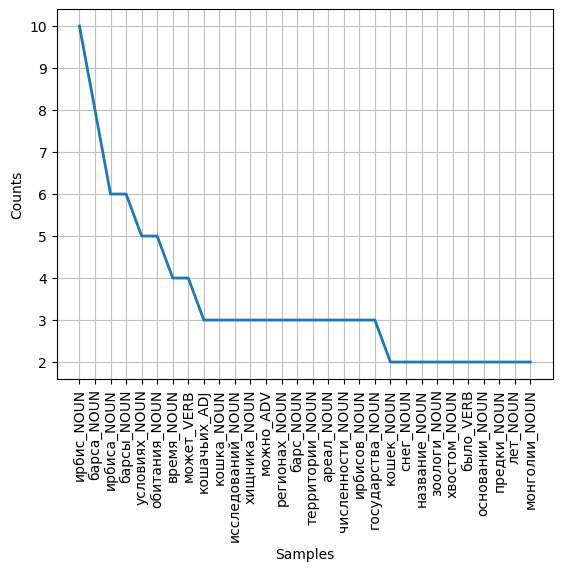

In [60]:
frequency_distribution_3 = FreqDist(list_of_tagged_RU)
frequency_distribution_3.plot(30, cumulative=False)

In [63]:
!python -m spacy download ru_core_news_sm
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 128.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 82.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [65]:
# Способ 3
import spacy


nlp_ru = spacy.load("ru_core_news_sm")
nlp_en = spacy.load("en_core_web_sm")

def lemmas(tokens, lang):
  nlp = nlp_en if lang == 'en' else nlp_ru
  joined = ' '.join(tokens)
  doc = nlp_ru(joined)
  return [token.lemma_ for token in doc if token.is_alpha]

ru_lemmas = lemmas(ru_filtered_tokens, "ru")
en_lemmas = lemmas(en_filtered_tokens, "en")

print(ru_lemmas)
print(en_lemmas)

['ирбис', 'повелитель', 'горный', 'заснеженных', 'вершина', 'сегодня', 'международный', 'день', 'снежный', 'барс', 'самое', 'время', 'поговорить', 'одной', 'самых', 'скрытный', 'малоизученный', 'кошка', 'наш', 'планета', 'ирбис', 'единственный', 'представитель', 'семейство', 'кошачий', 'обитать', 'суровый', 'условие', 'высокогорий', 'круглый', 'год', 'лежать', 'снег', 'само', 'название', 'ирбис', 'появиться', 'наш', 'язык', 'ещё', 'xvii', 'век', 'благодаря', 'тюркский', 'охотник', 'которые', 'продавать', 'шкура', 'дикий', 'кошка', 'русский', 'купец', 'меховщик', 'называть', 'снежный', 'барс', 'ильберс', 'ирбиш', 'ирвиз', 'перевод', 'тюркский', 'дословно', 'означать', 'снежный', 'кошка', 'впоследствии', 'название', 'слиться', 'воедино', 'образовать', 'одно', 'ирбиз', 'течение', 'время', 'буква', 'з', 'нем', 'смениться', 'впервые', 'диковинный', 'зверь', 'европейский', 'зоолог', 'узнать', 'год', 'привезти', 'исследователь', 'жорж', 'бюффоном', 'картинка', 'которых', 'изобразить', 'кошка'

<Axes: xlabel='Samples', ylabel='Counts'>

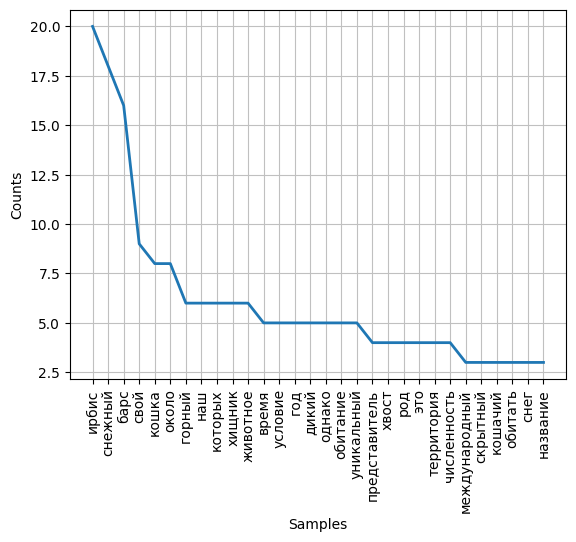

In [66]:
frequency_distribution_5 = FreqDist(ru_lemmas)
frequency_distribution_5.plot(30, cumulative=False)

<Axes: xlabel='Samples', ylabel='Counts'>

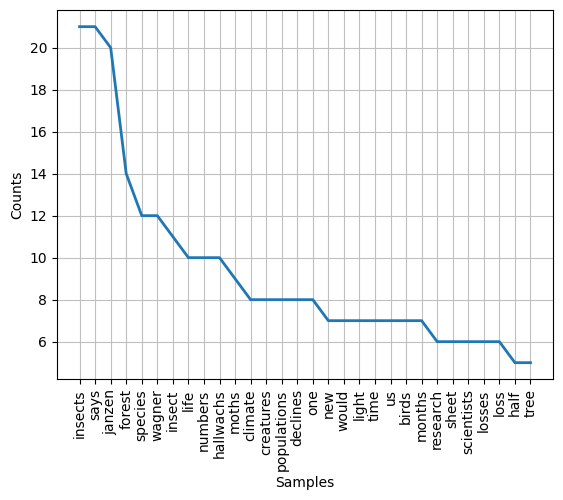

In [67]:
frequency_distribution_6 = FreqDist(en_lemmas)
frequency_distribution_6.plot(30, cumulative=False)

Метод звлечения ключевых слов влияет на топ-30.
1 способ: разбиение текста на токены может приводить к фрагментации смысловых слов по формам (одно и то же слово в разных формах считается отдельно).
2 способ позволяет выделить наиболее значимые слова в тексте (можно ограничить анализ только содержательными словами (сущ., гл., прил., н.), которые указывают на темы текста, действия и характеристики объектов).
3 способ (лемматизация) объединяет все грамматические варианты одного слова, что дает более точную частоту леммы, а значит и более точное тематическое содержание текста.